![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [246]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
#load dataset
netflix_df = pd.read_csv('netflix_data.csv')


Displaying Basic informations about dataset

In [247]:
#No of rows and columns of dataset
netflix_df.shape

(7787, 11)

In [248]:
#Displaying first few rows and shape
netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [249]:
#Displaying data types and non-null counts
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [250]:
#Changing date_added  date dtypes respectively
netflix_df['date_added']= pd.to_datetime(netflix_df['date_added'])

In [251]:
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
duration                 int64
description             object
genre                   object
dtype: object

In [252]:
#Dataset summary statistics
netflix_df.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


Accessing and Manipulating Data:

In [253]:
#Filtering to remove TV shows
netflix_subset = netflix_df[~netflix_df['type'].isin(['TV Show'])]

#netflix_subset few rows
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [254]:
#netflix_subset rows
netflix_subset.shape

(5377, 11)

In [255]:
#Accessing certain columns

netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

In [256]:
#Acessing short movies

short_movies = netflix_movies[netflix_movies["duration"] < 60]

short_movies.shape


(420, 5)

In [257]:
#few rows from short_movies
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


Inspecting the short movies by number of country, genre

In [258]:
short_movies.value_counts(["country", "genre"])

country         genre        
United States   Documentaries    78
                Children         59
                Stand-Up         40
United Kingdom  Documentaries    28
United States   Uncategorized    17
                                 ..
Netherlands     Music             1
Norway          Documentaries     1
Pakistan        Children          1
Poland          Comedies          1
South Korea     Stand-Up          1
Length: 64, dtype: int64

In [259]:
#Using grouping to inspect short_movies
short_movies.groupby(["country", "genre"])["duration"].mean()

country        genre        
Argentina      Stand-Up         50.000000
Australia      Children         33.000000
Brazil         Comedies         45.000000
               Stand-Up         59.000000
Canada         Children         31.923077
                                  ...    
United States  Dramas           23.000000
               Horror Movies    29.000000
               Music            52.000000
               Stand-Up         53.250000
               Uncategorized    35.000000
Name: duration, Length: 64, dtype: float64

In [260]:
#creating a color list with for loop and if/elif statements
colors = []
for index, row in netflix_movies.iterrows():   #iterate the rows
    if row['genre']== "Children":               #determine if the strings in each rows
        colors.append('blue')
    elif row['genre']== "Documentaries":
        colors.append('red')
    elif row['genre']== "Stand-Up":
        colors.append('green')
    else:
        colors.append('black')

Visualising the trend of Movie Duration over the years 

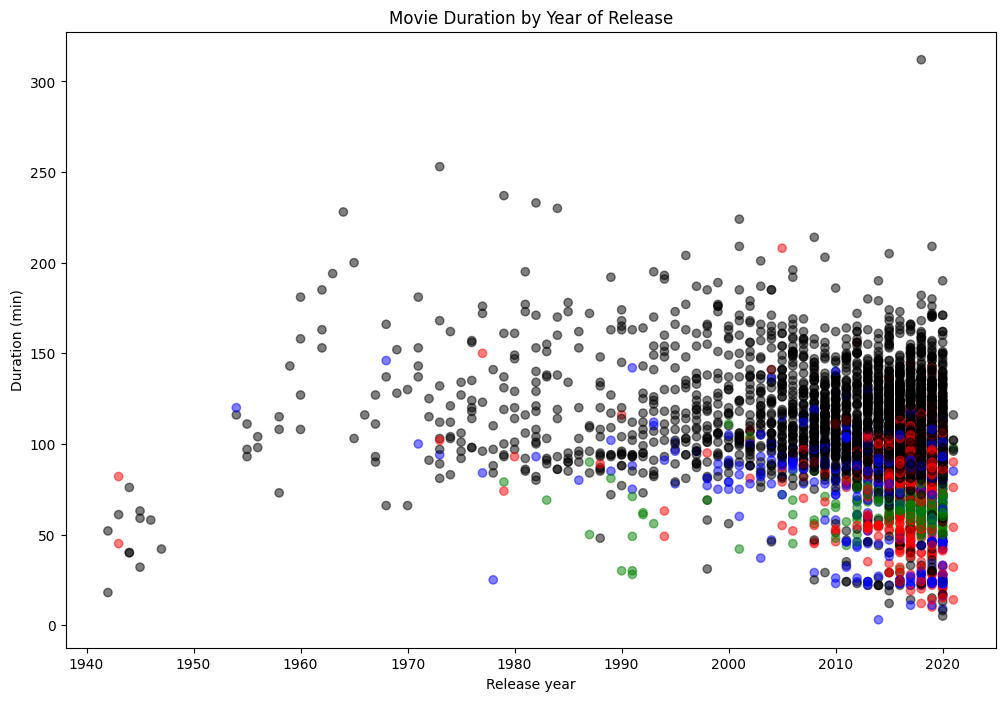

In [261]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))  #set figure sizes

plt.scatter(x= netflix_movies['release_year'], y=netflix_movies['duration'], color=colors, alpha=0.5)
plt.title("Movie Duration by Year of Release")
plt.xlabel('Release year')
plt.ylabel("Duration (min)")
plt.show()


In [262]:
#Answer to question
answer = 'maybe'